# CONTOUR PROPERTIES

https://docs.opencv.org/4.5.3/d3/d05/tutorial_py_table_of_contents_contours.html  
https://docs.opencv.org/4.5.3/d1/d32/tutorial_py_contour_properties.html

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv.imread("img/logo.png", cv.IMREAD_GRAYSCALE)
# ret, threshold = cv.threshold(img, 127, 255, 0)
#img = cv.medianBlur(img, 33)
#threshold = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
contours, hiearchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

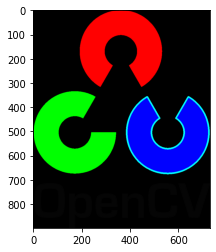

In [3]:
img_c = cv.imread("img/logo.png")
cv.drawContours(img_c, contours, 6, (255, 255, 0), 5)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

In [4]:
cnt = contours[6]

## 1. Aspect Ratio

In [5]:
x, y, w, h = cv.boundingRect(cnt)
aspect_ratio = float(w) / h
aspect_ratio

1.0725552050473186

## 2. Extent

In [6]:
area = cv.contourArea(cnt)
x, y, w, h = cv.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
extent

0.5892187789942476

## 3. Solidity

In [7]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area) / hull_area
solidity

0.7224759813652937

## 4. Equivalent Diameter

In [8]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4 * area / np.pi)
equi_diameter

284.35602776792206

## 5. Orientation

In [9]:
(x, y), (MajorAxisLength, minor_axis_length), angle = cv.fitEllipse(cnt)
angle

89.93110656738281

## 6. Mask and Pixel Points

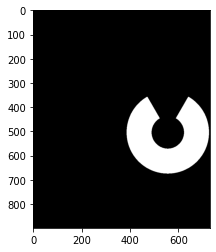

In [10]:
mask = np.zeros(img.shape, np.uint8)
cv.drawContours(mask, [cnt], 0, 255, -1)
#pixelpoints = np.transpose(np.nonzero(mask))
pixelpoints = cv.findNonZero(mask)
plt.imshow(mask, "gray")

## 7. Maximum Value, Minimum Value and their locations

In [11]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img, mask = mask)
cv.minMaxLoc(img, mask = mask)

(29.0, 30.0, (469, 358), (470, 358))

## 8. Mean Color or Mean Intensity

In [12]:
mean = cv.mean(img, mask = mask)
mean

(29.0033360874242, 0.0, 0.0, 0.0)

## 9. Extreme Points

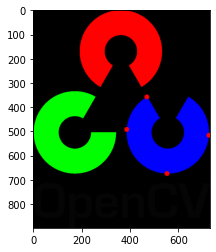

In [13]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
img_c = cv.imread("img/logo.png")
for point in [leftmost, rightmost, topmost, bottommost]:
    cv.circle(img_c, point, 0, (0, 0, 255), 20)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))